<a href="https://colab.research.google.com/github/DrewShapiro5/WCA_Data_Analysis/blob/main/WCA_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

pd.options.display.max_columns = 100

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import the file from google drive containing all WCA results since Feb 17 2025

In [ ]:
import gdown

file_id = "1ja996qL_jmm_1hdeTLuDLMRpIStguzFc"
file_path = "WCA_export.tsv"

gdown.download(f"https://drive.google.com/uc?id={file_id}", file_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1ja996qL_jmm_1hdeTLuDLMRpIStguzFc
From (redirected): https://drive.google.com/uc?id=1ja996qL_jmm_1hdeTLuDLMRpIStguzFc&confirm=t&uuid=1bb16266-9650-4d84-84b9-e0920e763bb7
To: /content/WCA_export.tsv
100%|██████████| 582M/582M [00:08<00:00, 66.2MB/s]


'WCA_export.tsv'

# Look at the top and bottom of the data.

In [ ]:
cube_df = pd.read_csv(file_path, sep='\t')
cube_df.head(10)

,competitionId,eventId,roundTypeId,pos,best,average,personName,personId,formatId,value1,value2,value3,value4,value5,regionalSingleRecord,regionalAverageRecord,personCountryId
0,LyonOpen2007,333,1,15,1968,2128,Etienne Amany,2007AMAN01,a,1968,2203,2138,2139,2108,AfR,AfR,Cote d_Ivoire
1,LyonOpen2007,333,1,16,1731,2140,Thomas Rouault,2004ROUA01,a,2222,2153,1731,2334,2046,NaN,NaN,France
2,LyonOpen2007,333,1,17,2305,2637,Antoine Simon-Chautemps,2005SIMO01,a,3430,2581,2540,2789,2305,NaN,NaN,France
3,LyonOpen2007,333,1,18,2452,2637,Irène Mallordy,2007MALL01,a,2715,2452,2868,2632,2564,NaN,NaN,France
4,LyonOpen2007,333,1,19,2677,2906,Marlène Desmaisons,2007DESM01,a,2921,3184,2891,2677,2907,NaN,NaN,France
5,LyonOpen2007,333,1,20,1869,2910,Ton Dennenbroek,2003DENN01,a,3309,1869,2558,2930,3241,NaN,NaN,Netherlands
6,LyonOpen2007,333,1,21,2411,2910,Arnaud van Galen,2006GALE01,a,2530,2696,2411,5512,3503,NaN,NaN,Netherlands
7,LyonOpen2007,333,1,22,2385,3111,Cyrille Cornu,2007CORN01,a,2844,3861,2628,3885,2385,NaN,NaN,France
8,LyonOpen2007,333,1,23,2639,3111,Christophe Woittequand,2005WOIT01,a,3084,3163,3087,3498,2639,NaN,NaN,France
9,LyonOpen2007,333,1,24,2687,3265,Georges Poinsot,2007POIN01,a,3387,3034,3373,3430,2687,NaN,NaN,France


In [ ]:
cube_df.tail(10)

,competitionId,eventId,roundTypeId,pos,best,average,personName,personId,formatId,value1,value2,value3,value4,value5,regionalSingleRecord,regionalAverageRecord,personCountryId
5307561,XMUMCubeOpen2025,sq1,f,7,812,1352,Tristan Chua Yong,2016YONG02,a,1651,1311,812,1152,1592,NaN,NaN,Singapore
5307562,XMUMCubeOpen2025,sq1,f,8,1102,1414,Nordarwish Akmal Bin Noor Ibrahim,2019IBRA02,a,1518,1254,1470,1787,1102,NaN,NaN,Malaysia
5307563,XMUMCubeOpen2025,sq1,f,9,1132,1441,Arif Imran Bin Arifin,2019ARIF06,a,1543,1453,1349,1132,1520,NaN,NaN,Malaysia
5307564,XMUMCubeOpen2025,sq1,f,10,1333,1449,Mohamad Adrian Syahirin Bin Mohd Faizal,2017FAIZ01,a,1342,1594,1410,1333,1601,NaN,NaN,Malaysia
5307565,XMUMCubeOpen2025,sq1,f,11,1217,1549,Charlize Tam Shi Kei (谭旭淇),2022KEIC01,a,1447,1903,1606,1217,1594,NaN,NaN,Malaysia
5307566,XMUMCubeOpen2025,sq1,f,12,1284,1576,Lim Chun Yik (林峻毅),2018YIKL01,a,1734,1608,1387,1284,1742,NaN,NaN,Malaysia
5307567,XMUMCubeOpen2025,sq1,f,13,1412,1888,Tan E Yan,2024YANT03,a,2342,1514,1412,2743,1807,NaN,NaN,Malaysia
5307568,XMUMCubeOpen2025,sq1,f,14,1280,1960,Muhammad Harith Bin Ahmad Hizad,2022HIZA02,a,2205,2283,1699,1975,1280,NaN,NaN,Malaysia
5307569,XMUMCubeOpen2025,sq1,f,15,1762,2139,Muhammad Shaheem Bin Muhammad Rubaie,2022RUBA01,a,2128,2437,1853,-1,1762,NaN,NaN,Malaysia
5307570,XMUMCubeOpen2025,sq1,f,16,1430,2272,Wong Chong Wen (黄崇文),2014WENW01,a,2190,2543,1430,2512,2113,NaN,NaN,Singapore


# Check the packaging

In [ ]:
cube_df.shape

(5307571, 17)

In [ ]:
cube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5307571 entries, 0 to 5307570
Data columns (total 17 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   competitionId          object
 1   eventId                object
 2   roundTypeId            object
 3   pos                    int64 
 4   best                   int64 
 5   average                int64 
 6   personName             object
 7   personId               object
 8   formatId               object
 9   value1                 int64 
 10  value2                 int64 
 11  value3                 int64 
 12  value4                 int64 
 13  value5                 int64 
 14  regionalSingleRecord   object
 15  regionalAverageRecord  object
 16  personCountryId        object
dtypes: int64(8), object(9)
memory usage: 688.4+ MB


This is great. As we can see, there is pretty much no missing data except for in columns we don't care about.

In [ ]:
cube_df.isnull().sum()

,0
competitionId,0
eventId,0
roundTypeId,0
pos,0
best,0
average,0
personName,0
personId,0
formatId,0
value1,0


In [ ]:
events = ['333', '444', '555', '666']
cube_events_df = cube_df[cube_df['eventId'].isin(events)].drop(columns=['regionalSingleRecord', 'regionalAverageRecord'])
# The memory usage might get a little high... We should remove the unnecessary data from memory.
del cube_df
print(cube_events_df.shape)

(2291284, 15)


In [ ]:
cube_events_df['formatId'].value_counts()

,count
formatId,
a,2181513
m,102345
3,3816
2,3267
1,343


Import data for competition date

In [ ]:
comp_dates_df = pd.read_csv('https://media.githubusercontent.com/media/DrewShapiro5/WCA_Data_Analysis/refs/heads/main/WCA_export/WCA_export_Competitions.tsv', sep='\t')
comp_dates_df.head()

,id,name,cityName,countryId,information,venue,venueAddress,venueDetails,external_website,cellName,latitude,longitude,cancelled,eventSpecs,wcaDelegate,organiser,year,month,day,endMonth,endDay
0,100Merito2018,100º Mérito 2018,"Santarém, Pará",Brazil,Qualquer pessoa que resolva o Cubo Mágico em m...,[Mérito Pré-Vestibulares](https://www.facebook...,"Avenida Mendonça Furtado, 1120 - CEP: 68040050",Próximo ao Colégio São Francisco,NaN,100º Mérito 2018,-2422498,-54712597,0,222 333 333bf 333ft 444 pyram skewb,[{Rafael de Andrade Cinoto}{mailto:rcinoto@wor...,[{Davi de Andrade Iácono}{mailto:diacono@world...,2018,4,14,4,14
1,100YearsRepublicAnkara2023,100 Years Republic Ankara 2023,Ankara,Turkey,[TR] Kayıt sırasında adınızı ve soyadınızı lüt...,TMMOB Teoman Öztürk Öğrenci Evi ve Sosyal Tesisi,"Mehmet Akif Ersoy, 295. Sk. No:6, 06200 Yenima...",6.kat / 6th floor,NaN,100 Years Republic Ankara 2023,39964026,32766238,0,222 333 333oh 444 555 clock pyram skewb sq1,[{Can Ersoy}{mailto:cersoy@worldcubeassociatio...,[{İskender Aznavur}{mailto:i.kuleli@gmail.com}...,2023,10,28,10,29
2,100YearsRepublicIstanbul2023,100 Years Republic İstanbul 2023,İstanbul,Turkey,[TR] Kayıt sırasında adınızı ve soyadınızı lüt...,[Bil Koleji Ümraniye Yerleşkesi](https://bilok...,"Cemil Meriç, Alemdağ Cd No:321, 34771 Dudullu ...",Yemek katı,NaN,100 Years Republic İstanbul 2023,41016582,29142873,0,222 333 333bf 333oh 444 555 clock pyram skewb sq1,[{Mustafa Çamlıca}{mailto:mcamlica@worldcubeas...,[{Alper Şakım}{mailto:alpersakim2@gmail.com}] ...,2023,10,28,10,29
3,100YilMBACubeWeekend2023,100. Yıl MBA Cube Weekend 2023,İstanbul,Turkey,[TR] Kayıt sırasında adınızı ve soyadınızı lüt...,[MBA Okulları Çamlıca Yerleşkesi](https://www....,"Küçük Çamlıca, Libadiye Cd. No:30, 34692 Üsküd...",Yemekhane / Dining Hall,NaN,100. Yıl MBA Cube Weekend 2023,41012107,29074717,0,222 333 333bf 333oh 444 555 666 777 clock minx...,[{Mustafa Çamlıca}{mailto:mcamlica@worldcubeas...,[{Alper Şakım}{mailto:alpersakim2@gmail.com}] ...,2023,12,16,12,17
4,10AniversarioGuatemala2023,Décimo Aniversario Guatemala 2023,Guatemala City,Guatemala,Ésta es una competencia conmemorativa en honor...,[Colegio Caré](https://care.edu.gt/),"23 calle 15-45, zona 13",NaN,NaN,10 Aniversario Guatemala 2023,14573384,-90525865,1,222 333 333bf 333oh 444 555 minx pyram,[{Adrián Ramírez}{mailto:aramirez@worldcubeass...,[{Nancy Ramírez}{mailto:nancy.r1116@gmail.com}],2023,10,14,10,15


In [ ]:
comp_dates_df['datetime'] = pd.to_datetime(comp_dates_df[['year', 'month', 'day']])
comp_dates_df['post_covid'] = comp_dates_df['datetime'] >= '2020-03-01'
comp_dates_df.drop(columns=['name', 'cityName', 'information', 'venue', 'venueAddress', 'venueDetails', 'external_website', 'cellName', 'eventSpecs', 'wcaDelegate', 'organiser', 'endMonth', 'endDay', 'year', 'month', 'day'], inplace=True)
comp_dates_df.head()

,id,countryId,latitude,longitude,cancelled,datetime,post_covid
0,100Merito2018,Brazil,-2422498,-54712597,0,2018-04-14,False
1,100YearsRepublicAnkara2023,Turkey,39964026,32766238,0,2023-10-28,True
2,100YearsRepublicIstanbul2023,Turkey,41016582,29142873,0,2023-10-28,True
3,100YilMBACubeWeekend2023,Turkey,41012107,29074717,0,2023-12-16,True
4,10AniversarioGuatemala2023,Guatemala,14573384,-90525865,1,2023-10-14,True


In [ ]:
comp_dates_df['competitors'] = comp_dates_df['id'].map(cube_events_df['competitionId'].value_counts())
comp_dates_df.dropna(inplace=True)
comp_dates_df.head()

,id,countryId,latitude,longitude,cancelled,datetime,post_covid,competitors
0,100Merito2018,Brazil,-2422498,-54712597,0,2018-04-14,False,54.0
1,100YearsRepublicAnkara2023,Turkey,39964026,32766238,0,2023-10-28,True,69.0
2,100YearsRepublicIstanbul2023,Turkey,41016582,29142873,0,2023-10-28,True,168.0
3,100YilMBACubeWeekend2023,Turkey,41012107,29074717,0,2023-12-16,True,203.0
5,10doRioGrandedoNorte2018,Brazil,-5536382,-35816234,0,2018-12-15,False,104.0


In [ ]:
comp_dates_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12496 entries, 0 to 14326
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           12496 non-null  object        
 1   countryId    12496 non-null  object        
 2   latitude     12496 non-null  int64         
 3   longitude    12496 non-null  int64         
 4   cancelled    12496 non-null  int64         
 5   datetime     12496 non-null  datetime64[ns]
 6   post_covid   12496 non-null  bool          
 7   competitors  12496 non-null  float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 793.2+ KB


# Visualization

With this newly-formatted data, we can look at where competitions are located globally. To do this, we use a density plot, where the x axis is longitude and the y axis is longitude. This shows us the distributions of competitions in a familiar way (in terms of location data), and we can assert that the distribution is reasonable based on our knowledge of the global map.

Text(0.5, 1.0, 'Pre-COVID Competition Locations')

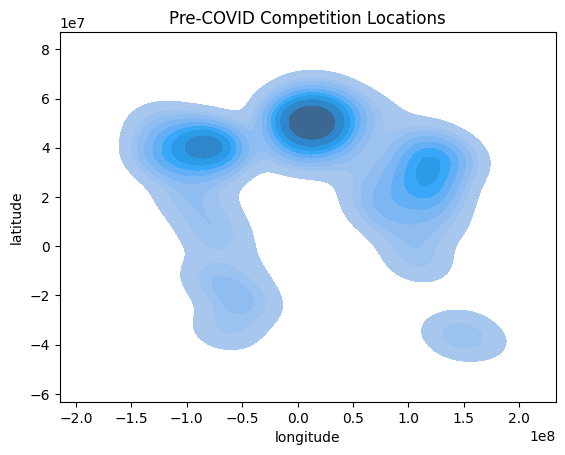

In [ ]:
sb.kdeplot(data=comp_dates_df[comp_dates_df['post_covid'] == False], x='longitude', y='latitude', weights='competitors', fill=True)
plt.title('Pre-COVID Competition Locations')

Text(0.5, 1.0, 'Post-COVID Competition Locations')

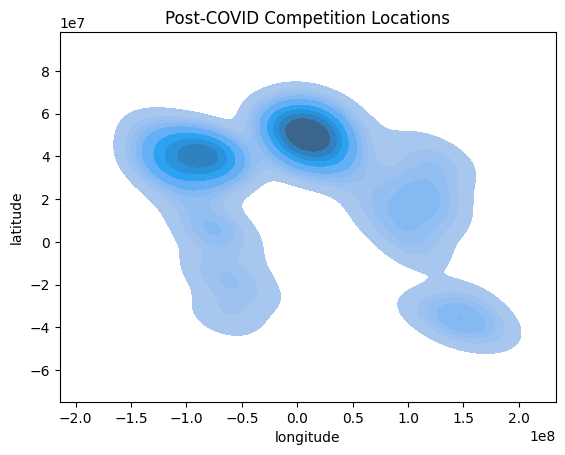

In [ ]:
sb.kdeplot(data=comp_dates_df[comp_dates_df['post_covid'] == True], x='longitude', y='latitude', weights='competitors', fill=True)
plt.title('Post-COVID Competition Locations')

In [ ]:
cube_events_df['date'] = cube_events_df['competitionId'].map(comp_dates_df.set_index('id')['datetime'])
cube_events_df.head()

,competitionId,eventId,roundTypeId,pos,best,average,personName,personId,formatId,value1,value2,value3,value4,value5,personCountryId,date
0,LyonOpen2007,333,1,15,1968,2128,Etienne Amany,2007AMAN01,a,1968,2203,2138,2139,2108,Cote d_Ivoire,2007-09-01
1,LyonOpen2007,333,1,16,1731,2140,Thomas Rouault,2004ROUA01,a,2222,2153,1731,2334,2046,France,2007-09-01
2,LyonOpen2007,333,1,17,2305,2637,Antoine Simon-Chautemps,2005SIMO01,a,3430,2581,2540,2789,2305,France,2007-09-01
3,LyonOpen2007,333,1,18,2452,2637,Irène Mallordy,2007MALL01,a,2715,2452,2868,2632,2564,France,2007-09-01
4,LyonOpen2007,333,1,19,2677,2906,Marlène Desmaisons,2007DESM01,a,2921,3184,2891,2677,2907,France,2007-09-01


We can also visualize the number of competitors over time. We use a histogram for this because it's a good way to visualize changes in number of data points over time. Each bin is about a month.

<Axes: title={'center': 'Number of competitors over time'}, xlabel='date', ylabel='Count'>

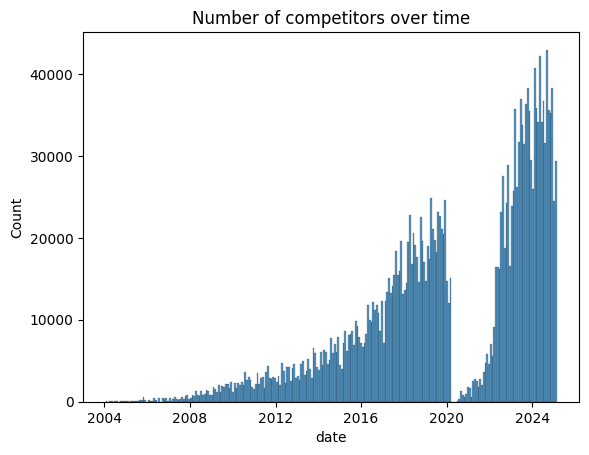

In [ ]:
plt.title('Number of competitors over time')
sb.histplot(data=cube_events_df[cube_events_df['date'] > '2004-01-01'], x='date', multiple='stack', binwidth=30)

average 3x3 time over the years is also something we can visualize. A scatterplot is good for this becasue it lets us visualize individual datapoints, allowing us to see general trends over time.

We take a smaller sample from the overall data because plotting the whole dataset in this way takes several seconds.

In [ ]:
cube_events_completesolves_df = cube_events_df[cube_events_df['average'] > 0]
cube_events_completesolves_df['ao5 (seconds)'] = cube_events_completesolves_df['average'].apply(lambda x: float(x) / 100)

<ipython-input-174-abcda5fa251f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cube_events_completesolves_df['ao5 (seconds)'] = cube_events_completesolves_df['average'].apply(lambda x: float(x) / 100)


<Axes: title={'center': '3x3 ao5 Over Time'}, xlabel='date', ylabel='ao5 (seconds)'>

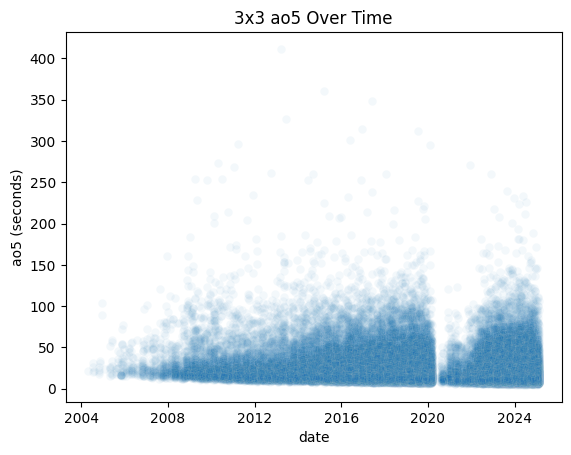

In [ ]:
plt.title('3x3 ao5 Over Time')
sb.scatterplot(data=cube_events_completesolves_df[cube_events_completesolves_df['eventId'] == '333'].sample(n=100000), x='date', y='ao5 (seconds)', alpha=0.05)

Which countries have the highest number of entries?

In [ ]:
top_countries = cube_events_df['personCountryId'].value_counts().head(10)
top_countries

,count
personCountryId,
USA,504345
China,152053
Poland,103467
India,93949
Australia,84319
United Kingdom,77525
Germany,74448
Canada,67942
France,62586


Let's visualize a statistical overview for averages in the top 10 countries. A box plot works well for this because we can view the low, high (ignoring outliers), median and interquartile values for each country side-by-side.

We can start with just 3x3:

Text(0.5, 1.0, '3x3 Time by Country')

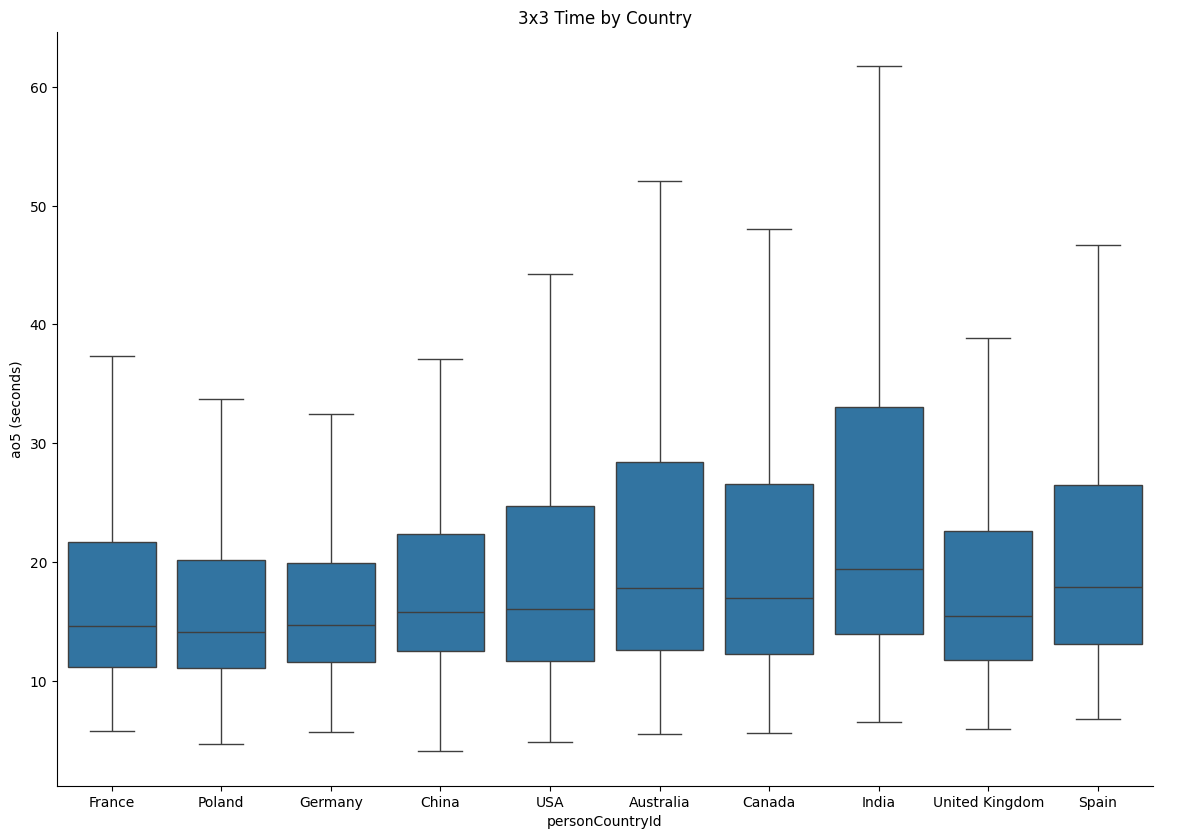

In [ ]:
sb.catplot(data=cube_events_completesolves_df[(cube_events_completesolves_df['personCountryId'].isin(top_countries.index)) & (cube_events_completesolves_df['eventId'] == '333')],
           x='personCountryId', y='ao5 (seconds)', kind='box', showfliers=False, height=8.27, aspect=11.7/8.27)
plt.title('3x3 Time by Country')

Text(0.5, 1.0, 'Solve Time by Country')

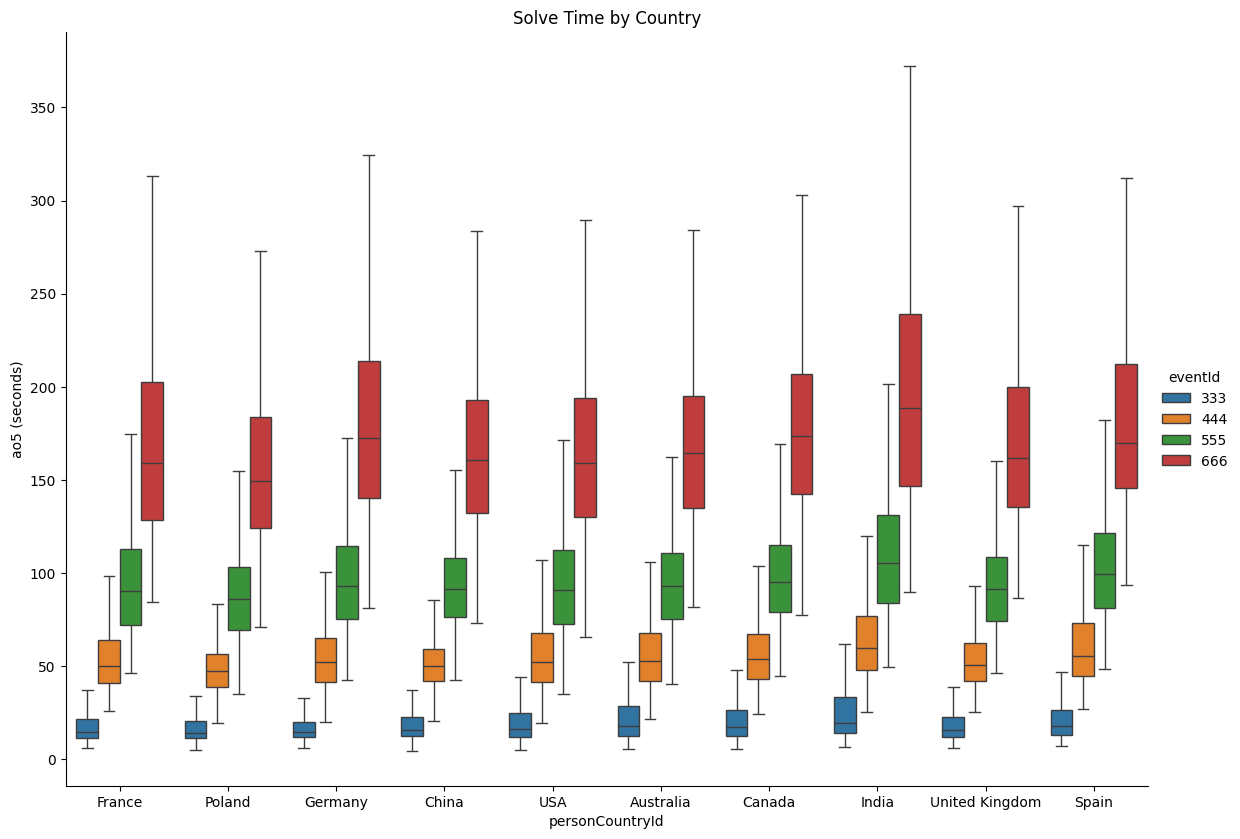

In [ ]:
sb.catplot(data=cube_events_completesolves_df[cube_events_completesolves_df['personCountryId'].isin(top_countries.index)],
           x='personCountryId', y='ao5 (seconds)', kind='box', showfliers=False, height=8.27, aspect=11.7/8.27, hue='eventId')
plt.title('Solve Time by Country')

Now I want to visualize how number of 3x3 competitions influences a solver's top 3x3 average. i'll create a new dataframe that holds each competitor's top average and their number of competitions attended (for 3x3).

In [ ]:
cube_3x3_solvers = cube_events_completesolves_df[cube_events_completesolves_df['eventId'] == '333'].groupby('personId').agg(
    top_ao5=('average', 'min'),  # min because lower times are better
    competition_count=('competitionId', 'nunique')  # count unique competitions
).reset_index()

cube_3x3_solvers = cube_3x3_solvers.set_index('personId')

cube_3x3_solvers.head()

,top_ao5,competition_count
personId,,
1982FRID01,2048,2
1982PETR01,2048,26
1982RAZO01,1786,17
1982VALD01,7444,1
2003AKIM01,1722,12


Text(0.5, 1.0, 'Top ao5 vs Competition count')

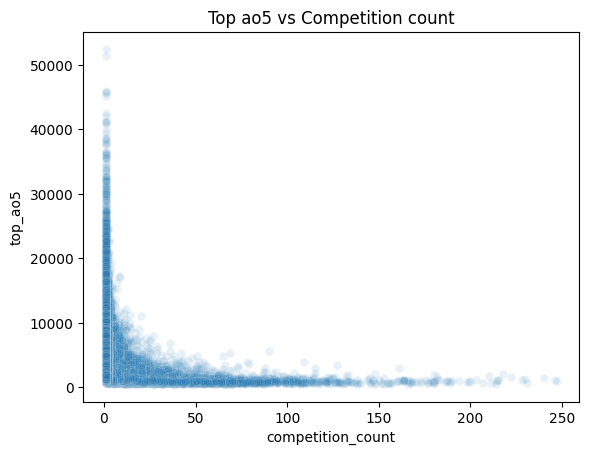

In [ ]:
sb.scatterplot(data=cube_3x3_solvers, x='competition_count', y='top_ao5', alpha=0.1)
plt.title('Top ao5 vs Competition count')

As we can see by this plot, there appears to be some kind of trend, but the area under the whole curve is filled, which makes it hard to really tell what's going on. I'm going to look instead at the mean of all top averages for a given number of competitions attended. This is more abstract, but might give us a better picture of what the real trend looks like, and remove some of the noise.

In [ ]:
median_time_for_compcount = cube_3x3_solvers.groupby('competition_count').agg(
    median_top_ao5=('top_ao5', 'median'),
).reset_index()

median_time_for_compcount.describe()

,competition_count,median_top_ao5
count,189.000000,189.000000
mean,100.698413,1053.306878
std,63.264550,396.591503
min,1.000000,557.000000
25%,48.000000,849.000000
50%,95.000000,983.000000
75%,147.000000,1100.500000
max,247.000000,3936.000000


Text(0.5, 1.0, 'Median top ao5 vs Competition count')

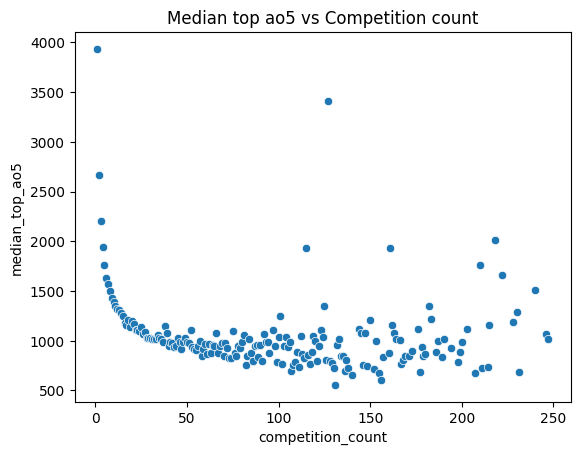

In [ ]:
sb.scatterplot(data=median_time_for_compcount, x='competition_count', y='median_top_ao5')
plt.title('Median top ao5 vs Competition count')

This curve looks a lot more meaningful. At first glance it looked a lot like 1/x, but I've realized after further analysis that it most closely resembles a **saturating growth** curve of the form (a*x)/(b+x)+c. I want to remove some of the outliers to make this curve-fitting more meaningful.

In [ ]:
#Every entry with index above 100 and median top average above 1500 will be considered an outlier
outliers = median_time_for_compcount[median_time_for_compcount['median_top_ao5'] > 1500][median_time_for_compcount[median_time_for_compcount['median_top_ao5'] > 1500].index > 100]
outliers

,competition_count,median_top_ao5
113,115,1937.5
125,127,3413.0
150,161,1937.5
177,210,1765.0
181,218,2015.0
182,222,1661.0
186,240,1515.0


In [ ]:
median_time_drop_outliers = median_time_for_compcount.drop(index=outliers.index)
# Use only competition count values up to 150 to avoid the noise
median_time_df = median_time_drop_outliers[median_time_drop_outliers['competition_count'] < 150]
median_time_df.tail()

,competition_count,median_top_ao5
138,144,1122.5
139,145,1077.5
140,146,757.0
141,147,1075.0
142,148,749.0


# Function fitting

With outliers dropped, let's fit this function:

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

# Define inverse function
def sat_growth(x, a, b, c):
    return (a * x) / (b + x) + c

# Fit to data (skip x=0 to avoid division by zero)
# Also don't go above x=150 (to avoid noise)
x_data = median_time_df[(median_time_for_compcount['competition_count'] > 0)]['competition_count']
y_data = median_time_df[(median_time_for_compcount['competition_count'] > 0)]['median_top_ao5']

params, _ = curve_fit(sat_growth, x_data, y_data)
a, b, c = params

print(f"Fit: median_top_ao5 ≈ ({a:.2f} * competition_count) / (competition_count + {b:.2f}) + {c:.2f}")

Fit: median_top_ao5 ≈ (-6832.41 * competition_count) / (competition_count + 0.79) + 7692.61


<ipython-input-185-39fa6bd9edd5>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_data = median_time_df[(median_time_for_compcount['competition_count'] > 0)]['competition_count']
<ipython-input-185-39fa6bd9edd5>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y_data = median_time_df[(median_time_for_compcount['competition_count'] > 0)]['median_top_ao5']


Text(0.5, 1.0, 'Saturating growth curve for Median top ao5 vs. Competition count')

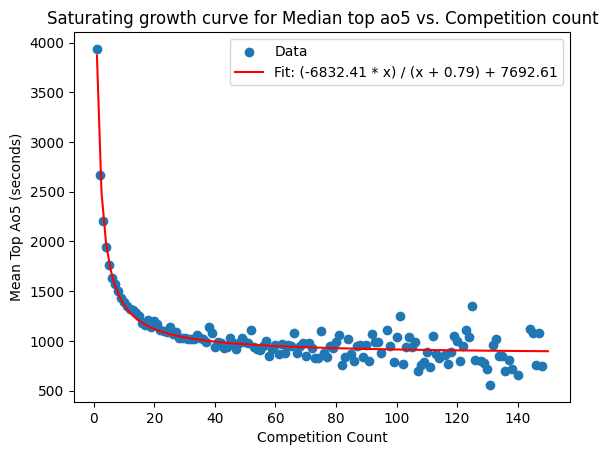

In [ ]:
# This is the function that predicts median top average from competition count
def f(x):
  return (a * x) / (b + x) + c
x_pred = np.linspace(1, 150, 100)
y_pred = f(x_pred)
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_pred, y_pred, 'r-', label=f"Fit: ({a:.2f} * x) / (x + {b:.2f}) + {c:.2f}")
plt.xlabel('Competition Count')
plt.ylabel('Mean Top Ao5 (seconds)')
plt.legend()
plt.title('Saturating growth curve for Median top ao5 vs. Competition count')

Let's plot the residuals:

In [ ]:
median_time_df['difference'] = median_time_df['median_top_ao5'] - median_time_df['competition_count'].apply(f)
median_time_df.head()

<ipython-input-187-bd5b34306fe0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  median_time_df['difference'] = median_time_df['median_top_ao5'] - median_time_df['competition_count'].apply(f)


,competition_count,median_top_ao5,difference
0,1,3936.0,66.003001
1,2,2670.0,-120.199320
2,3,2205.0,-75.612440
3,4,1939.0,-44.913895
4,5,1765.0,-24.748588


Text(0.5, 1.0, 'Residuals for saturating growth curve')

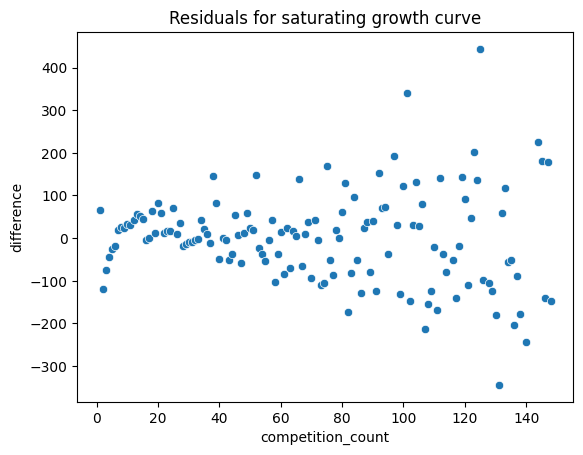

In [ ]:
sb.scatterplot(data=median_time_df, x='competition_count', y='difference')
plt.title('Residuals for saturating growth curve')

It mostly just looks like a cone, which shows us that the function chosen is a pretty good depiciton of the data.

Let's determine the R-squared value for this model we've created:

In [ ]:
y_predicted = x_data.apply(f)
ss_res = np.sum((y_data - y_predicted) ** 2)       # Residual sum of squares
ss_tot = np.sum((y_data - np.mean(y_predicted)) ** 2)  # Total sum of squares
r_squared = 1 - (ss_res / ss_tot)
print(f"R²: {r_squared:.4f}")

R²: 0.9126


Woah. That's absolutely MASSIVE. We can compare this to a regular linear model:

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [ ]:
m0 = smf.ols(formula = 'median_top_ao5 ~ competition_count',data=median_time_df).fit()
m0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         median_top_ao5   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     54.50
Date:                Thu, 01 May 2025   Prob (F-statistic):           1.30e-11
Time:                        01:04:32   Log-Likelihood:                -1007.3
No. Observations:                 141   AIC:                             2019.
Df Residuals:                     139   BIC:                             2025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1368.1833     51.664     26.483      0.000    1266.035    1470.331
competition_count    -4.5909      0.622     -7.382      0.000      -5.820      -3.361
==============================================================================
Omnibus:                      183.803   Durbin-Watson:                   0.367
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7927.246
Skew:                           5.011   Prob(JB):                         0.00
Kurtosis:                      38.339   Cond. No.                         165.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Line of best fit for Median top average vs. Competition count')

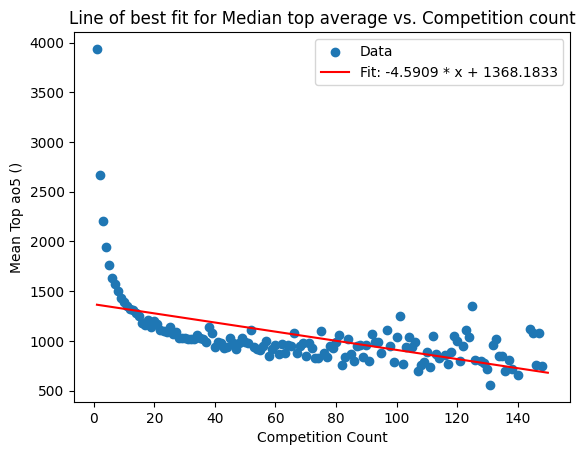

In [ ]:
# This shows our line of best fit
def line_obf(x):
  return (-4.5909 * x) + 1368.1833
x_pred_line = np.linspace(1, 150, 100)
y_pred_line = line_obf(x_pred)
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_pred_line, y_pred_line, 'r-', label=f"Fit: -4.5909 * x + 1368.1833")
plt.xlabel('Competition Count')
plt.ylabel('Mean Top ao5 ()')
plt.legend()
plt.title('Line of best fit for Median top average vs. Competition count')

The R-squared value for this linear model is much lower. This shows that our fit function is a great predictor for median top average based on competition count.

Text(0, 0.5, 'Quantity (percent)')

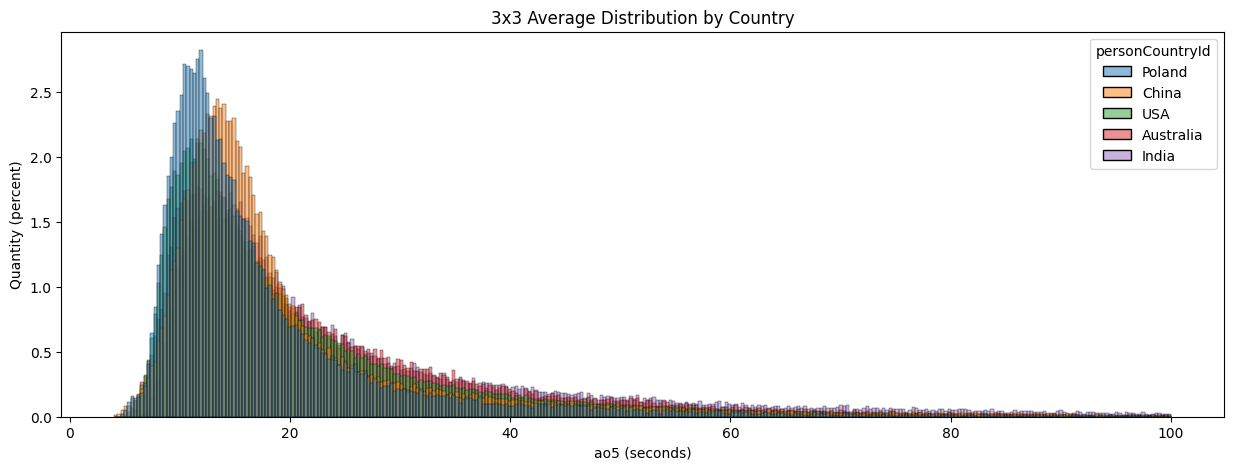

In [ ]:
top_countries_3x3_df = cube_events_completesolves_df[(cube_events_completesolves_df['eventId'] == '333') & (cube_events_completesolves_df['average'] < 10000) & (cube_events_completesolves_df['personCountryId'].isin(top_countries.head(5).index))]
plt.figure(figsize=(15, 5))  # width = 10 inches, height = 5 inches
sb.histplot(data=top_countries_3x3_df, x='ao5 (seconds)', label='Data', element='bars', hue='personCountryId', multiple='layer', stat='percent', common_norm=False)
plt.title('3x3 Average Distribution by Country')
plt.xlabel('ao5 (seconds)')
plt.ylabel('Quantity (percent)')

Check the normality for each country's data:

<ipython-input-194-c9c3f1298fda>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_countries_3x3_df.loc[:, 'log_average'] = np.log(top_countries_3x3_df['average'])


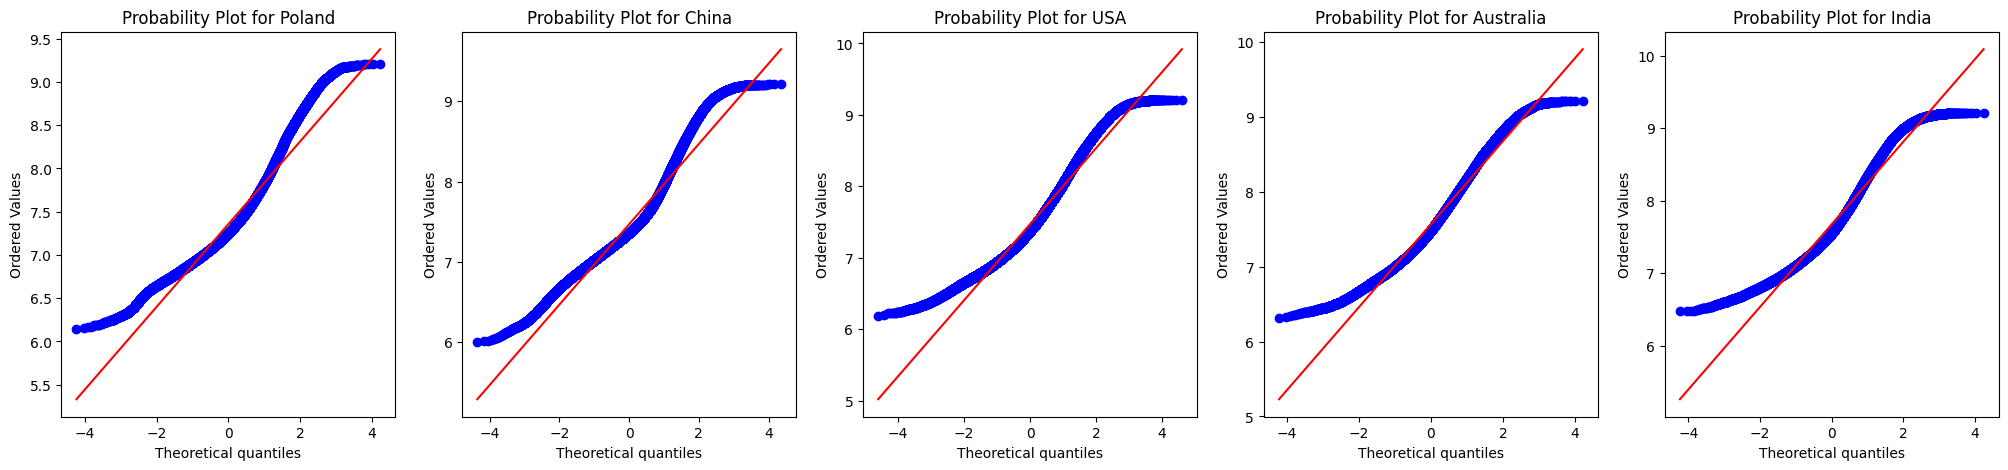

In [ ]:
import scipy.stats as stats
# Because data is right skewed, apply log function to normalize it
top_countries_3x3_df.loc[:, 'log_average'] = np.log(top_countries_3x3_df['average'])

countries = top_countries_3x3_df['personCountryId'].unique()

n_countries = len(countries)
fig, axes = plt.subplots(1, n_countries, figsize=(5*n_countries, 5))

# Create a probplot for each country
for ax, country in zip(axes, countries):
    country_data = top_countries_3x3_df[top_countries_3x3_df['personCountryId'] == country]['log_average']

    stats.probplot(country_data, plot=ax)
    ax.set_title(f'Probability Plot for {country}')

plt.show()

These plots demonstrate that the distribution of log_average is somewhat normal. Thus, we can move on with the ANOVA test to determine if 3x3 solve times are different between difference countries.

In [ ]:
m1 = smf.ols('log_average ~ C(personCountryId)', data=top_countries_3x3_df).fit()
anova_table = sm.stats.anova_lm(m1, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(personCountryId),3733.506560,4.0,3207.524684,0.0
Residual,178335.693949,612846.0,NaN,NaN


Since the p-value is 0, we can be confident that the mean ao5 is significantly different between countries.